In [1]:
#import packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import warnings

plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
df = pd.read_csv('../data/Cleaned_Churn_Data.csv')

In [3]:
df.head()

,Status ID,Customer ID,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,Employee Related Cancellation,Product/Service Related Cancellation,Competitor Cancellation,Price Cancellation,Service ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Location ID,State,City,Zip Code
0,SWSORB1252,8779-QRDMV,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,0,0,1,0,IJKDQVSWH3522,No,0,1,Unknown/None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,Male,78,No,Yes,No,No,0,OXCZEW7397,California,Los Angeles,90022
1,SNAEQA8572,7495-OOKFY,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer,0,0,1,0,BFKMZJAIE2285,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,Female,74,No,Yes,Yes,Yes,1,FCCECI8494,California,Los Angeles,90063
2,LMBQNN3714,1658-BYGOY,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer,0,0,1,0,EIMVJQBMT7187,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,Male,71,No,Yes,No,Yes,3,HEHUQY7254,California,Los Angeles,90065
3,VRZYZI9978,4598-XLKNJ,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services,0,1,0,0,EROZQXDUU4979,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,Female,78,No,Yes,Yes,Yes,1,WIUHRF2613,California,Inglewood,90303
4,FDNAKX1688,4846-WHAFZ,2,Churned,Yes,1,67,2793,Price,Extra data charges,0,0,0,1,GEEYSJUHY6991,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,Female,80,No,Yes,Yes,Yes,1,CFEZBF4415,California,Whittier,90602


In [4]:
df.describe()

,Satisfaction Score,Churn Value,Churn Score,CLTV,Employee Related Cancellation,Product/Service Related Cancellation,Competitor Cancellation,Price Cancellation,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Age,Number of Dependents,Zip Code
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3.244924,0.265370,58.505040,4400.295755,0.059634,0.039472,0.119409,0.029959,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,46.509726,0.468692,93486.071134
std,1.201657,0.441561,21.170031,1183.057152,0.236824,0.194728,0.324293,0.170486,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,16.750352,0.962802,1856.768045
min,1.000000,0.000000,5.000000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,19.000000,0.000000,90001.000000
25%,3.000000,0.000000,40.000000,3469.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,32.000000,0.000000,92101.000000
50%,3.000000,0.000000,61.000000,4527.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,46.000000,0.000000,93518.000000
75%,4.000000,1.000000,75.500000,5380.500000,0.000000,0.000000,0.000000,0.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,60.000000,0.000000,95329.000000
max,5.000000,1.000000,96.000000,6500.000000,1.000000,1.000000,1.000000,1.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,80.000000,9.000000,96150.000000


In [5]:
df['State'].unique()

array(['California'], dtype=object)

In [6]:
# All values are 'California' so cannot provide us any further insight 
df.drop(columns=['State'], inplace=True)

In [7]:
df['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

# We have 1,869 customers who have churned to analyze

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 52 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Status ID                             7043 non-null   object 
 1   Customer ID                           7043 non-null   object 
 2   Satisfaction Score                    7043 non-null   int64  
 3   Customer Status                       7043 non-null   object 
 4   Churn Label                           7043 non-null   object 
 5   Churn Value                           7043 non-null   int64  
 6   Churn Score                           7043 non-null   int64  
 7   CLTV                                  7043 non-null   int64  
 8   Churn Category                        7043 non-null   object 
 9   Churn Reason                          7043 non-null   object 
 10  Employee Related Cancellation         7043 non-null   int64  
 11  Product/Service R

In [9]:
#Fill NaN missing Internet Type entries as None. Those customers do not have internet service.
df['Internet Type'].fillna('None', inplace=True)

In [10]:
df.isnull().sum()

Status ID                               0
Customer ID                             0
Satisfaction Score                      0
Customer Status                         0
Churn Label                             0
Churn Value                             0
Churn Score                             0
CLTV                                    0
Churn Category                          0
Churn Reason                            0
Employee Related Cancellation           0
Product/Service Related Cancellation    0
Competitor Cancellation                 0
Price Cancellation                      0
Service ID                              0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                     

# First we'll address categorical variables

In [11]:
# We will drop the unique ID columns as these will not help us in our analysis
df.drop(columns=['Status ID', 'Customer ID', 'Service ID', 'Location ID'], inplace=True)

In [12]:
df['Customer Status'].value_counts()

Customer Status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64

Being a new customer or a longer term customer can be treated the same for the purpose of our analysis. Combining the two creates a duplicate of other columns so we will drop this column.

In [13]:
df.drop(columns=['Customer Status'], inplace=True)

In [14]:
#This column is identical to Churn Value so we can drop it
df.drop(columns=['Churn Label'], inplace=True)

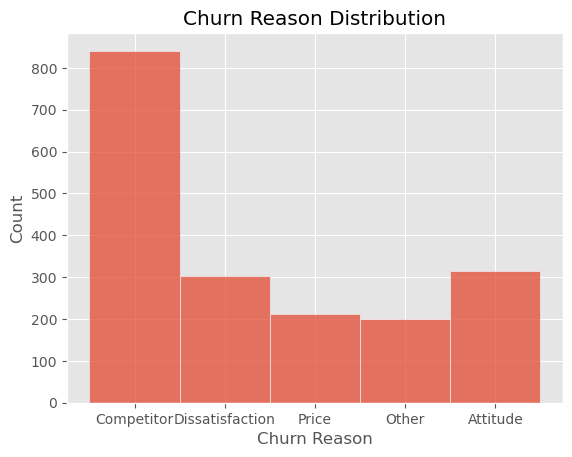

In [15]:
# Distribution of reasons why customers churned
churned = df[df['Churn Category'] != 'Did Not Churn']
churn_hist = sns.histplot(x='Churn Category', data=churned)
churn_hist = plt.xlabel('Churn Reason')
churn_hist = plt.ylabel('Count')
churn_hist = plt.title('Churn Reason Distribution')

As we can see, the most common reason a customer churned was relating to Competitors. Customers churned for this reason more that twice as often as the next most common reason, which was the attitude of someone in our company during an interaction with the customer.

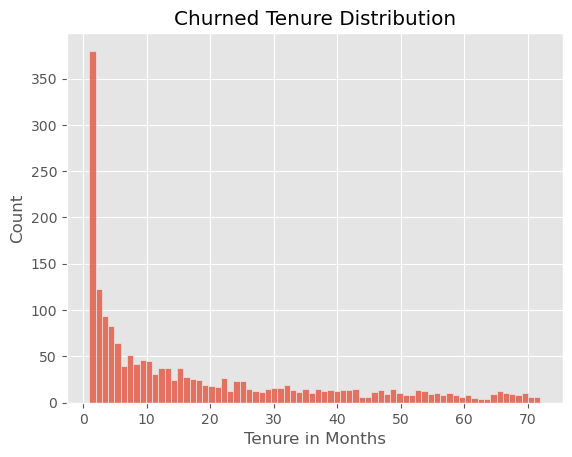

In [16]:
# Distribution of churned customer's tenure
churned_tenure = df[df['Churn Value'] == 1]['Tenure in Months']
tenure_hist1 = sns.histplot(data=churned_tenure, bins=72)
tenure_hist1 = plt.xlabel('Tenure in Months')
tenure_hist1 = plt.ylabel('Count')
tenure_hist1 = plt.title('Churned Tenure Distribution')

Over 20% of all customers who have churned, did so after only the first month and generally fewer customers churned the longer they were a customer. Reducing the churn rate in this group would go a long way, but to do so we need to know why they churned.

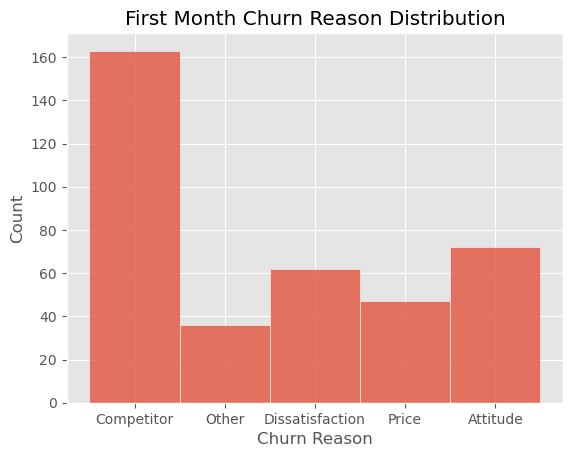

In [17]:
# Distribution of first month churned customer's reason for cancellation
churned_1month = df[(df['Churn Value'] == 1) & (df['Tenure in Months'] == 1)]
month1_hist = sns.histplot(x='Churn Category', data=churned_1month)
month1_hist = plt.xlabel('Churn Reason')
month1_hist = plt.ylabel('Count')
month1_hist = plt.title('First Month Churn Reason Distribution')

Competitor is still the main reason customers are churning after the first month just like in the broader data. Interestingly, we do see an uptick in dissatisfaction and attitude being the reason why people churned after the first month.

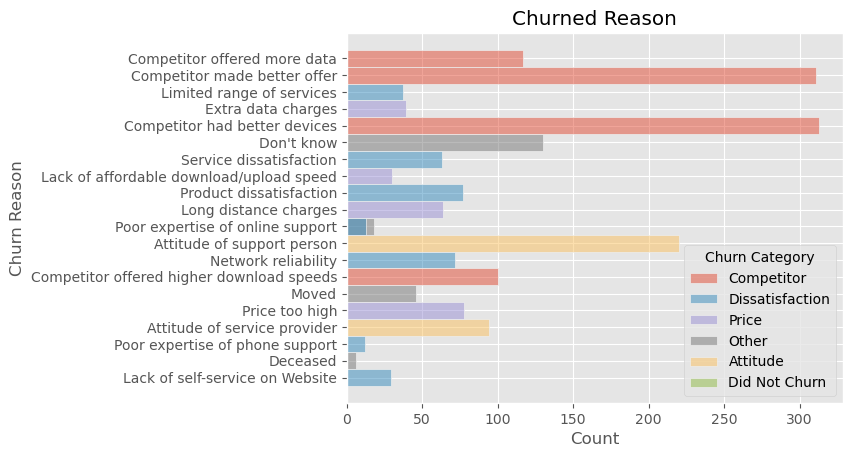

In [18]:
# Distribution of churn reason
churn_reason = df[df['Churn Reason'] != 'Did Not Churn']
cr_hist = sns.histplot(y= 'Churn Reason', data=churn_reason, hue=df['Churn Category'])
cr_hist = plt.xlabel('Count')
cr_hist = plt.ylabel('Churn Reason')
cr_hist = plt.title('Churned Reason')

Within each churn category, we can see the breakdown of specific churn reason. Not surprising the top two reasons are competitor related, being competitor had better devices and competitor made better offer. This may be indicative that we need to look at our device offerings and pricing compared to the competition.<p>
The next most common reason customers churn is the attitude of the support person so we may want to have customer service drill down into that further to find why that is the case.

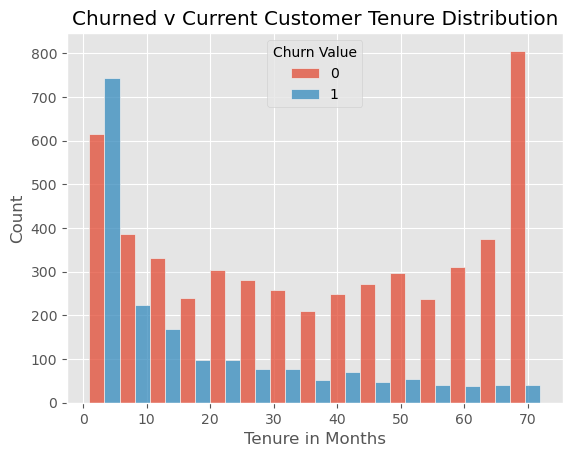

In [19]:
# Distribution of churned & current customer's tenure
tenure_hist2 = sns.histplot(x='Tenure in Months', data=df, bins='auto', hue="Churn Value", multiple="dodge")
tenure_hist2 = plt.xlabel('Tenure in Months')
tenure_hist2 = plt.ylabel('Count')
tenure_hist2 = plt.title('Churned v Current Customer Tenure Distribution')

Comparing the distribution of tenure for both current and churned customers shows us a couple things.<p>
First it shows us that, as we saw before, we lose a lot of customers after only one month, and we also have a very large number of new customers.  This appears that as a company we are putting a lot of effort into the top of the funnel replacing the 1 month customers we just lost rather than trying to retain those customers in the first place. We also see that we have a large number of loyal customers who have been with us for 72 months or more.

In [20]:
df[df['Churn Value'] == 1]['City'].value_counts().head(20)

City
San Diego          185
Los Angeles         78
San Francisco       31
San Jose            29
Sacramento          26
Fallbrook           26
Temecula            22
Escondido           16
Long Beach          15
Glendale            13
Fresno              13
Oakland             13
Modesto             12
Stockton            12
Santa Rosa          11
Santa Barbara       10
Pasadena             9
Berkeley             9
North Hollywood      9
Lakewood             8
Name: count, dtype: int64

We can see that about 10% of all customers who churned are in San Diego. There are are lot of unique values here so we will frequency encode this in a later step.

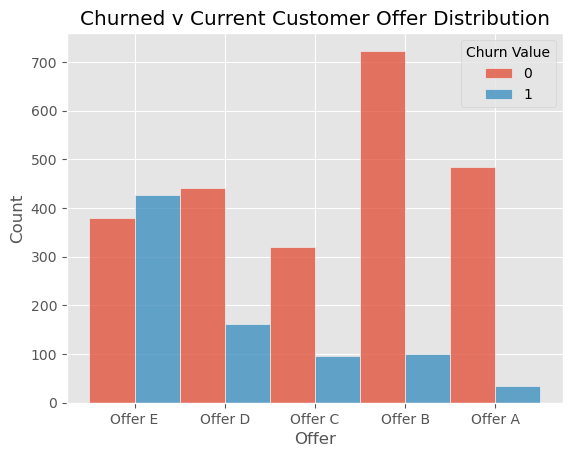

In [21]:
# Distribution of churned & current customer's known offer type
offer_hist = sns.histplot(x='Offer', data=df[df['Offer'] != 'Unknown/None'], bins='auto', hue="Churn Value", multiple="dodge")
offer_hist = plt.xlabel('Offer')
offer_hist = plt.ylabel('Count')
offer_hist = plt.title('Churned v Current Customer Offer Distribution')

This shows us that if a customer signs up with Offer A or Offer B, the customer has an overwhelming chance of staying with the company longer. Offer C & Offer D are ok but not nearly as effective as A or B. Interestingly, if a customer signs up with Offer E, they actually churn more often than they stay a customer.

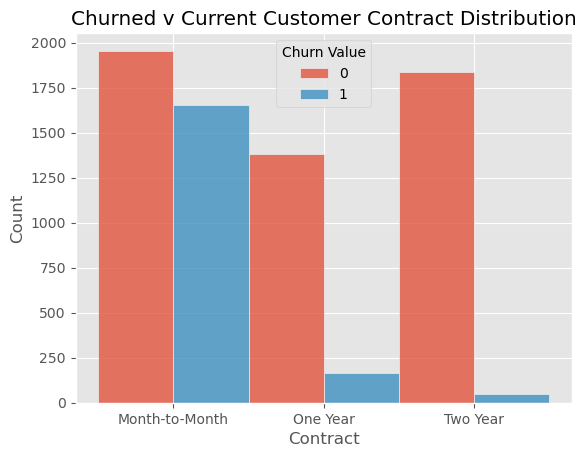

In [22]:
# Distribution of churned & current customer's known contract type
contract_hist = sns.histplot(x='Contract', data=df, bins='auto', hue="Churn Value", multiple="dodge")
contract_hist = plt.xlabel('Contract')
contract_hist = plt.ylabel('Count')
contract_hist = plt.title('Churned v Current Customer Contract Distribution')

Here we see that if a customer signs a 1 or 2 year contract, they overwhelmingly do not churn, while customers that are month to month churn almost as much as they stay a customer. Putting more of a focus on signing 1 or 2 year contracts, possibly in conjuntion with offering Offer A or B above, should reduce churn significantly.

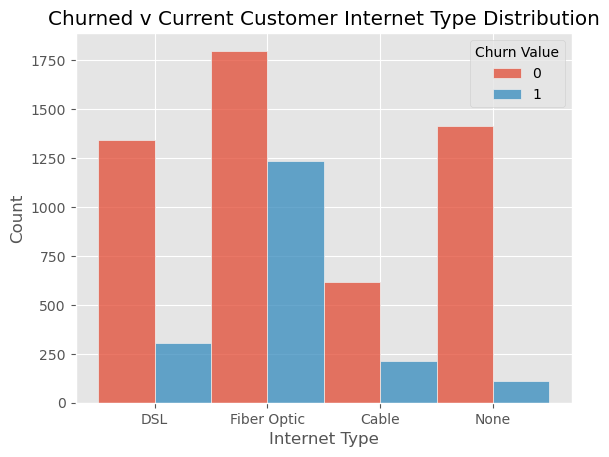

In [23]:
# Distribution of churned & current customer's known Internet type
internet_hist1 = sns.histplot(x='Internet Type', data=df, bins='auto', hue="Churn Value", multiple="dodge")
internet_hist1 = plt.xlabel('Internet Type')
internet_hist1 = plt.ylabel('Count')
internet_hist1 = plt.title('Churned v Current Customer Internet Type Distribution')

This shows that a higher proportion of customers who have fiber optic internet churn compared to other categories so this may point to an opportunity to improve our fiber optic offering. Interestingly, customers who do no have internet with us tend to stay as customers more than customers with our internet service.

# Next we'll move on to our quantitative features

In [24]:
# Create df of quantitative features for analysis
df_quant = df.select_dtypes(include = ['int64', 'float64'])

We have a lot of quantitative features, so we'll want to pare these down to visualize only those with strong positive or negative correlations.

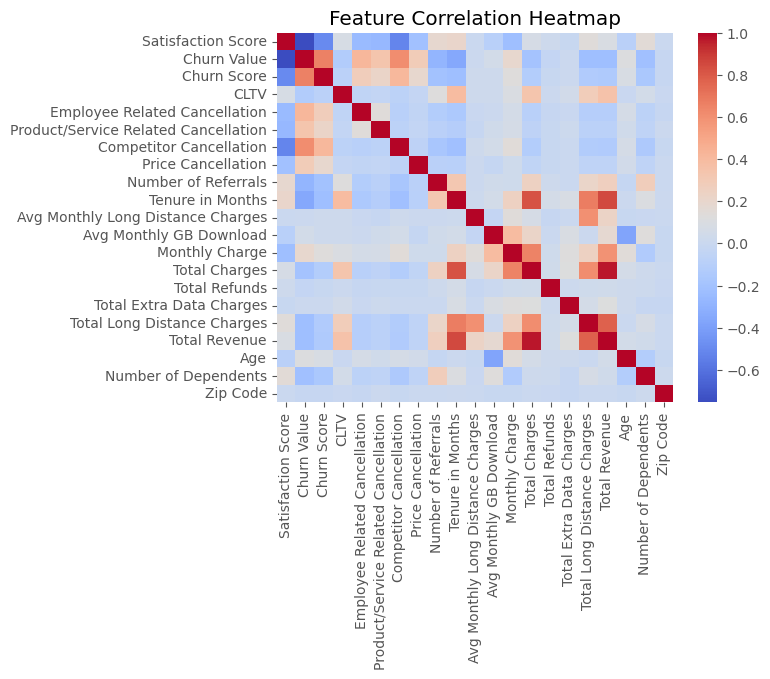

In [25]:
# Heatmap of features with strong postive or negative correlations
heatmap = sns.heatmap(df_quant.corr(), cmap="coolwarm")
heatmap = plt.title('Feature Correlation Heatmap')

We see some immaterial correlations such as between Total Charges and Tenure in Months (of course the longer a customer is with the company, the greater the total the customer will have paid) and between Total Charges and Total Revenue.<p>

The feature that we'll be targeting in our models is Churn Value so let's start there. Satisfaction Score has a strong negative correlation.

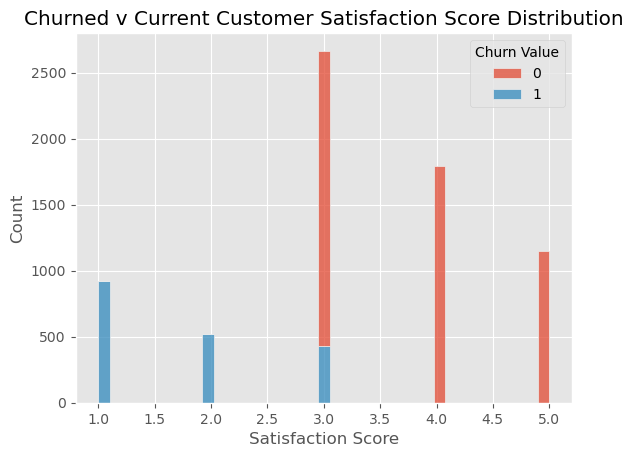

In [26]:
# Distribution of churned & current customer's Satisfaction Score
internet_hist2 = sns.histplot(x='Satisfaction Score', data=df, hue="Churn Value", multiple="stack")
internet_hist2 = plt.xlabel('Satisfaction Score')
internet_hist2 = plt.ylabel('Count')
internet_hist2 = plt.title('Churned v Current Customer Satisfaction Score Distribution')

As we saw when we were cleaning the data, if a customer's satisfaction score is 4 or 5, they will remain a customer. If their satisfaction score is a 3, they will overwhelmingly stay a customer but will churn about 20% of the time. If a customer's satisfacion score is 2 or 1, they will churn 100% of the time.

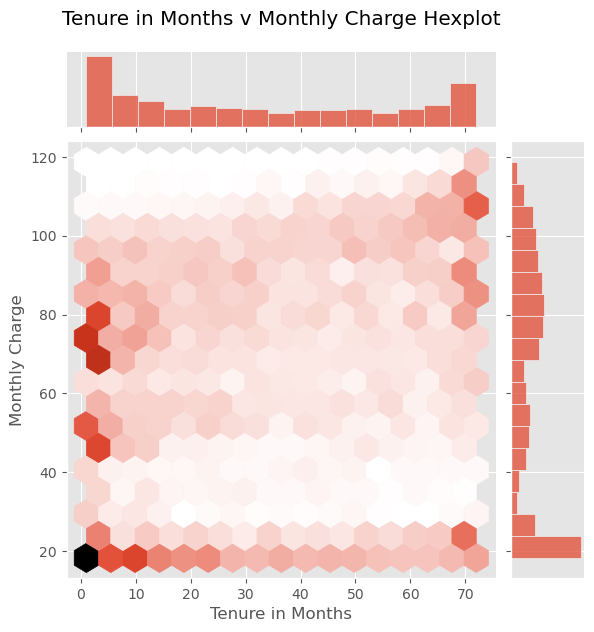

In [27]:
# Tenure v Monthly Charge Hex Plot
tenure_hex = sns.jointplot(x='Tenure in Months', y='Monthly Charge', data=df, kind='hex')
tenure_hex = plt.xlabel('Tenure in Months')
tenure_hex = plt.ylabel('Monthly Charge')
tenure_hex = plt.title('Tenure in Months v Monthly Charge Hexplot', y=1.25)

The observations are pretty spread out but a couple trends do emerge. There is a large number of newer customers as we have already seen, and most of them are paying around 50/month or between 70/month -80/month. As customers stay with the company longer, we see the price they pay going up where we see a cluster of customers who have been with the company for 6 years or more paying over 100/month.

# Conclusion
Satisfaction Score so far seems to be the best predictor of Churn Value and could be a good baseline test to run our models against. We've also already observed some opportunities of things we can address internally to reduce churn including:
1) More customers churn after only 1 month than at any other point so much more effort needs to be put into reinforcing the customer's decision to do business with us during that first month. If that's all we did, we would see a very large decrease in churn.
2) The top three reasons why customers churn are Competitor had better devices, Competitor made better offer, and attitude of the support person so we can address our offerings and improve training of customer support.
3) The offer that a customer signs up with has a great effect on whether the customer will churn or not. With Offers A & B, customers overwhelmingly stay with the company while more people churn when signed up with Offer E than stay. Ending offer E and putting more promotion into Offers A & B should greatly reduce churn.
4) The distribution of contract type shows that customers that sign up with 1 or 2 year contracts rarely churn while customers on month to month contracts churn almost as much as they stay. Adding incentives to get customers to sign 1 or 2 year contracts, possibly being done in conjuction with offering Offer A or B, should also reduce churn substantially.

We have many features in our dataset, many of them categorical data and binary data so finding high correlations and predictors of our target variable (Churn Value) will be more effective when building our models and combining multiple features.
# Next we'll get our data ready for modeling

In [28]:
# Calculate the frequency of each category in the 'City' column & map the frequencies back to the original 'City' column
city_frequency = df['City'].value_counts()
df['City'] = df['City'].map(city_frequency)

In [29]:
# Hot encode categorical variables to be used later in our models
df_numerical = pd.get_dummies(df, drop_first=True)
df_numerical

,Satisfaction Score,Churn Value,Churn Score,CLTV,Employee Related Cancellation,Product/Service Related Cancellation,Competitor Cancellation,Price Cancellation,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Age,Number of Dependents,City,Zip Code,Churn Category_Competitor,Churn Category_Did Not Churn,Churn Category_Dissatisfaction,Churn Category_Other,Churn Category_Price,Churn Reason_Attitude of support person,Churn Reason_Competitor had better devices,Churn Reason_Competitor made better offer,Churn Reason_Competitor offered higher download speeds,Churn Reason_Competitor offered more data,Churn Reason_Deceased,Churn Reason_Did Not Churn,Churn Reason_Don't know,Churn Reason_Extra data charges,Churn Reason_Lack of affordable download/upload speed,Churn Reason_Lack of self-service on Website,Churn Reason_Limited range of services,Churn Reason_Long distance charges,Churn Reason_Moved,Churn Reason_Network reliability,Churn Reason_Poor expertise of online support,Churn Reason_Poor expertise of phone support,Churn Reason_Price too high,Churn Reason_Product dissatisfaction,Churn Reason_Service dissatisfaction,Referred a Friend_Yes,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Offer_Unknown/None,Phone Service_Yes,Multiple Lines_Yes,Internet Service_Yes,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Online Security_Yes,Online Backup_Yes,Device Protection Plan_Yes,Premium Tech Support_Yes,Streaming TV_Yes,Streaming Movies_Yes,Streaming Music_Yes,Unlimited Data_Yes,Contract_One Year,Contract_Two Year,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check,Gender_Male,Under 30_Yes,Senior Citizen_Yes,Married_Yes,Dependents_Yes
0,3,1,91,5433,0,0,1,0,0,1,0.00,8,39.65,39.65,0.00,20,0.00,59.65,78,0,293,90022,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,True,False,False
1,3,1,69,5302,0,0,1,0,1,8,48.85,17,80.65,633.30,0.00,0,390.80,1024.10,74,1,293,90063,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,True,True,False,True,False,False,True,False,False,False,False,False,True,False,False,True,True,False,False,False,True,True,True
2,2,1,81,3179,0,0,1,0,0,18,11.33,52,95.45,1752.55,45.61,0,203.94,1910.88,71,3,293,90065,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,False,True,False,False,False,False,False,True,True,True,True,False,False,True,False,False,True,False,True,False,True
3,2,1,88,5337,0,1,0,0,1,25,19.76,12,98.50,2514.50,13.43,0,494.00,2995.07,78,1,25,90303,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,True,False,True,False,False,True,True,False,True,True,False,True,False,False,True,False,False,False,False,True,True,True
4,2,1,67,2793,0,0,0,1,1,37,6.33,14,76.50,2868.15,0.00,0,234.21,3102.36,80,1,30,90602,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [30]:
df_numerical.replace({False: 0, True: 1}, inplace=True)

In [31]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 77 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Satisfaction Score                                      7043 non-null   int64  
 1   Churn Value                                             7043 non-null   int64  
 2   Churn Score                                             7043 non-null   int64  
 3   CLTV                                                    7043 non-null   int64  
 4   Employee Related Cancellation                           7043 non-null   int64  
 5   Product/Service Related Cancellation                    7043 non-null   int64  
 6   Competitor Cancellation                                 7043 non-null   int64  
 7   Price Cancellation                                      7043 non-null   int64  
 8   Number of Referrals                   

Now all of our non-numeric features are encoded numerically so our models will be better able to use said features to predict our target variable. We know this is far too much dimensionality to be effective but we do not yet know which or how many features to use to produce the best models.

We will address this by testing for the optimal value for k using GridSearchCV in the modeling phase.

Although useful for EDA, we also need to drop all columns with churn categories or churn reasons to avoid data leakage as we would not have this information prior to a customer churning.

In [32]:
# Drop columns at index positions 22 to 46
df_numerical.drop(df_numerical.columns[22:47], axis=1, inplace=True)

In [33]:
df_numerical.drop(df_numerical.columns[4:8], axis=1, inplace=True)

In [34]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Satisfaction Score                 7043 non-null   int64  
 1   Churn Value                        7043 non-null   int64  
 2   Churn Score                        7043 non-null   int64  
 3   CLTV                               7043 non-null   int64  
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Avg Monthly GB Download            7043 non-null   int64  
 8   Monthly Charge                     7043 non-null   float64
 9   Total Charges                      7043 non-null   float64
 10  Total Refunds                      7043 non-null   float64
 11  Total Extra Data Charges           7043 non-null   int64

# Lastly we will export our encoded data to a csv file

In [35]:
#Save DataFrame as CSV
df_numerical.to_csv('../data/Cleaned_And_Encoded_Churn_Data_For_Modeling.csv', index=False)